# Project - Cars4U

Objective:
- To explore and visualize the dataset
- Building a linear regression model to predict the prices of used cars
- Create a set of insights and recommendations to help the business



In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the data
train_data = pd.read_csv("used_cars_data.csv")

## Start the EDA

In [3]:
train_data.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.shape
#data.shape tells us that there are 7253 entries in this dataset
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
train_data.isnull().sum().sort_values(ascending = False)
#this shows that there are 6247 rows in the New_Price column with missing data
#1234 rows in the Price column with missing data
#53 rows in the Seats columns with missing data
#46 rows in the power and engine columns with missing data
#2 rows in the mileage column with missing data


New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [6]:
duplicates_train_data = train_data[train_data.duplicated(['S.No.'])]
#shows that there are no duplicate serial numbers
train_data.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1747,1747,Maruti Eeco 7 Seater Standard,Coimbatore,2017,28371,Petrol,Manual,First,15.1 kmpl,1196 CC,73 bhp,7.0,4.98 Lakh,4.74
2147,2147,Maruti Ciaz AT ZXi,Mumbai,2014,46738,Petrol,Automatic,First,19.12 kmpl,1373 CC,91.1 bhp,5.0,NaN,6.10
7191,7191,Renault Duster 110PS Diesel RxZ,Delhi,2013,62000,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.0,NaN,NaN
4585,4585,Hyundai EON Era,Kochi,2017,8243,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,3.21
125,125,Mahindra Scorpio VLX,Kolkata,2014,42000,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,8.0,NaN,7.75
879,879,Maruti Swift DDiS ZDI Plus,Hyderabad,2018,5456,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,NaN,8.65
811,811,Honda Mobilio S i DTEC,Chennai,2015,65000,Diesel,Manual,First,24.2 kmpl,1498 CC,98.6 bhp,7.0,NaN,5.50
2783,2783,Ford Ecosport 1.5 Ti VCT MT Trend,Coimbatore,2014,62497,Petrol,Manual,First,15.8 kmpl,1499 CC,110 bhp,5.0,NaN,7.52
3030,3030,BMW 3 Series 320d Sport,Mumbai,2012,37000,Diesel,Automatic,Third,22.69 kmpl,1995 CC,190 bhp,5.0,NaN,15.00
4911,4911,Honda City V MT,Pune,2012,69000,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.90


In [7]:
#convert mileage column to an integer type
#based on the forum, the academic team said it was ok to equivalate kmpl and km/g, so I will drop the unit 

#Mileage missing data was removed bc the removed data represents 0.03% of the data (2/7253), so this removal should not affect the data statistics
train_data.dropna(subset = ["Mileage"], inplace = True)

train_data["Mileage"] = train_data["Mileage"].str.rstrip(" kmpl")
train_data["Mileage"] = train_data["Mileage"].str.rstrip(" km/g")
train_data["Mileage"] = train_data["Mileage"].astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Name               7251 non-null   object 
 2   Location           7251 non-null   object 
 3   Year               7251 non-null   int64  
 4   Kilometers_Driven  7251 non-null   int64  
 5   Fuel_Type          7251 non-null   object 
 6   Transmission       7251 non-null   object 
 7   Owner_Type         7251 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7205 non-null   object 
 10  Power              7205 non-null   object 
 11  Seats              7198 non-null   float64
 12  New_Price          1005 non-null   object 
 13  Price              6017 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 849.7+ KB


In [8]:
train_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
#replace the missing data with the median values

#Seats missing data
train_data["Seats"].median()
train_data["Seats"]=train_data["Seats"].fillna(train_data["Seats"].median())
train_data.isnull().sum().sort_values(ascending = False)

#There are no more NaN in the 'Seats' columns 


New_Price            6246
Price                1234
Power                  46
Engine                 46
Seats                   0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [10]:
#Engine missing data

train_data.dropna(subset = ["Engine", "Power"], inplace = True)
train_data.isnull().sum().sort_values(ascending = False)

train_data["Engine"] = train_data["Engine"].str.rstrip(" CC")
train_data["Engine"]=train_data["Engine"].astype(int)

train_data.isnull().sum().sort_values(ascending = False)

New_Price            6200
Price                1224
Seats                   0
Power                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [11]:
##Power missing data
#remove unit
train_data["Power"] = train_data["Power"].str.rstrip(" bhp")

train_data.sample(20)

train_data= train_data.replace(regex="null", value = np.nan)
train_data.dropna(subset = [ "Power"], inplace = True)

train_data["Power"] =train_data["Power"].astype(float)
train_data["Power"].median()

train_data.isnull().sum().sort_values(ascending = False)

#train_data.info()


New_Price            6071
Price                1202
Seats                   0
Power                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

## Outlier Detection
in this section, I will determine which values are outliers, and which values arent

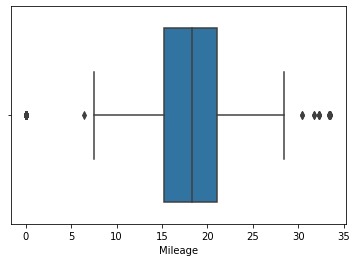

In [12]:
sns.boxplot(train_data.Mileage)

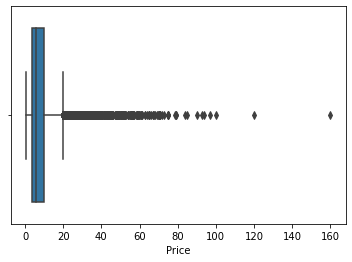

In [13]:
sns.boxplot(train_data.Price)

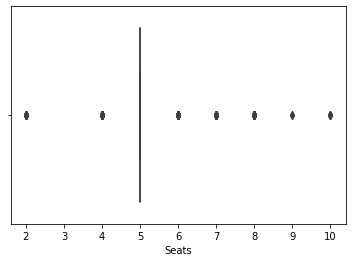

In [14]:
sns.boxplot(train_data.Seats)

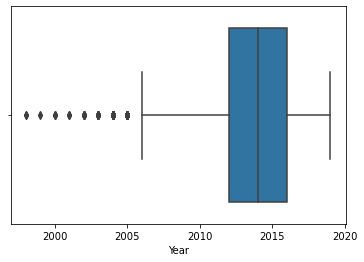

In [15]:
sns.boxplot(train_data.Year)

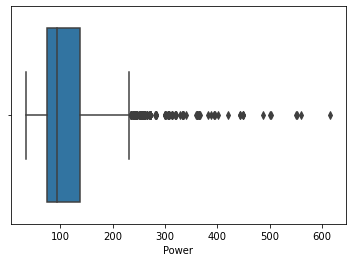

In [16]:
sns.boxplot(train_data.Power)

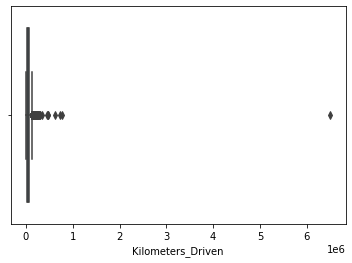

In [17]:
sns.boxplot(train_data.Kilometers_Driven)

In [18]:
#compute z score of only float and integer columns

from scipy import stats

train_copy = train_data.copy()
#drop the columns with non integer columns
train_copy = train_copy.drop(columns =["Name", "Location", "Fuel_Type",'Transmission', "Owner_Type", "New_Price"]) 
train_copy
#from scipy import stats


z = np.abs(stats.zscore(train_copy))
print(z)

threshold = 3
np.where(z > threshold)

[[1.73363742 1.10386147 0.16127269 ... 1.0211735  0.35160732        nan]
 [1.73315963 0.48191971 0.20250012 ... 0.2508771  0.35160732        nan]
 [1.73268184 0.78670524 0.14382709 ... 0.45020899 0.35160732        nan]
 ...
 [1.73036579 0.469549   0.35505001 ... 0.92881709 0.35160732        nan]
 [1.73084359 0.15239276 0.07034498 ... 0.17164412 0.35160732        nan]
 [1.73132138 0.16476347 0.16647112 ... 1.06974564 0.35160732        nan]]


<ipython-input-18-d341c789671a>:16: RuntimeWarning: invalid value encountered in greater
  np.where(z > threshold)


(array([   7,   14,   60,   67,   70,   70,   76,  121,  130,  130,  143,
         147,  147,  180,  215,  221,  264,  266,  303,  314,  324,  328,
         346,  352,  379,  405,  426,  443,  443,  473,  480,  489,  527,
         540,  559,  568,  568,  571,  571,  584,  595,  597,  605,  611,
         672,  672,  672,  686,  743,  746,  749,  765,  773,  773,  773,
         789,  789,  834,  885,  890,  933,  936,  942,  967,  979,  984,
        1009, 1009, 1017, 1030, 1048, 1063, 1063, 1093, 1149, 1189, 1190,
        1192, 1227, 1237, 1255, 1274, 1284, 1296, 1310, 1315, 1315, 1317,
        1401, 1422, 1440, 1474, 1480, 1487, 1491, 1553, 1585, 1609, 1613,
        1633, 1641, 1651, 1676, 1696, 1719, 1745, 1800, 1814, 1835, 1857,
        1861, 1861, 1866, 1870, 1884, 1884, 1923, 1928, 1938, 1975, 1990,
        2002, 2011, 2040, 2046, 2046, 2050, 2050, 2076, 2117, 2246, 2256,
        2270, 2271, 2278, 2287, 2300, 2311, 2413, 2424, 2450, 2457, 2459,
        2479, 2486, 2488, 2498, 2500, 

### Insights from outliers

I have identified the outliers of the above dataset, but for this problem, I will not remove or replace these outliers, so that I can later determine the effect of the outliers on the modelling.


In [19]:
#since there ~10% of the rows have no price, I will move those rows into a test datest, 
#and keep the rows with the price in a training dataset

train_data = train_data.sort_values("Price", na_position='last')
train_data
test_data = train_data[-1202:]
test_data
test_data.info()
test_data.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 6019 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              1202 non-null   int64  
 1   Name               1202 non-null   object 
 2   Location           1202 non-null   object 
 3   Year               1202 non-null   int64  
 4   Kilometers_Driven  1202 non-null   int64  
 5   Fuel_Type          1202 non-null   object 
 6   Transmission       1202 non-null   object 
 7   Owner_Type         1202 non-null   object 
 8   Mileage            1202 non-null   float64
 9   Engine             1202 non-null   int64  
 10  Power              1202 non-null   float64
 11  Seats              1202 non-null   float64
 12  New_Price          182 non-null    object 
 13  Price              0 non-null      float64
dtypes: float64(4), int64(4), object(6)
memory usage: 140.9+ KB


Price                1202
New_Price            1020
Seats                   0
Power                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

## Feature Detection

Because this dataset only has 14 columns, of which 6 columns (Kilometers driven, mileage, engine, power, seats, and price), I will not group this data yet in the preprocesing step. If in later steps I realize I need to reduce the variables, I will group columns using feature detection then.

In [20]:
# #now, I will remove these rows from the train datasert

train_data.dropna(subset = ["Price"], inplace =True)
train_data.info()
train_data.isnull().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 1713 to 4079
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5874 non-null   int64  
 1   Name               5874 non-null   object 
 2   Location           5874 non-null   object 
 3   Year               5874 non-null   int64  
 4   Kilometers_Driven  5874 non-null   int64  
 5   Fuel_Type          5874 non-null   object 
 6   Transmission       5874 non-null   object 
 7   Owner_Type         5874 non-null   object 
 8   Mileage            5874 non-null   float64
 9   Engine             5874 non-null   int64  
 10  Power              5874 non-null   float64
 11  Seats              5874 non-null   float64
 12  New_Price          823 non-null    object 
 13  Price              5874 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 688.4+ KB


New_Price            5051
Price                   0
Seats                   0
Power                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

###### The data has been processed now. there are no dupliates, all the missing data has been dealt with. Now, we can look into the univariate analysis before further analysis


## EDA

In [92]:
train_data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,5874,NaN,NaN,NaN,3012.63,1737.49,0,1509.25,3014.5,4515.75,6018
Name,5874,1812,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5874,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5874,NaN,NaN,NaN,2013.48,3.16602,1998,2012,2014,2016,2019
Kilometers_Driven,5874,NaN,NaN,NaN,58324.1,92154.7,171,33431.2,52621.5,72408.2,6.5e+06
Fuel_Type,5874,4,Diesel,3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5874,2,Manual,4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5874,4,First,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5874,NaN,NaN,NaN,6.65302e-16,1.00009,-4.18013,-0.689412,-0.0168883,0.646485,3.49213
Engine,5874,NaN,NaN,NaN,-9.07797e-15,1.00009,-1.66536,-0.711066,-0.216463,0.60732,7.26908


In [22]:
train_copy = train_data.copy()
train_copy

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1713,1713,Tata Nano Lx,Pune,2011,65000,Petrol,Manual,Second,26.00,624,35.0,4.0,NaN,0.44
3138,3138,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993,60.0,5.0,NaN,0.45
2847,2847,Hyundai Getz GLS,Pune,2005,86000,Petrol,Manual,Second,15.30,1341,83.0,5.0,NaN,0.45
1628,1628,Maruti 800 Std BSIII,Jaipur,2004,12000,Petrol,Manual,Second,16.10,796,37.0,4.0,NaN,0.45
3228,3228,Maruti 800 Std,Pune,2003,52000,Petrol,Manual,First,16.10,796,37.0,4.0,NaN,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979,320.0,5.0,NaN,93.67
1505,1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993,255.0,5.0,1.39 Cr,97.07
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000,488.1,2.0,NaN,100.00
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204,560.0,2.0,NaN,120.00


### Insights from EDA and outliers:
- the data does not look too skewed
- there are no glaring outliers, but I will need to confirm with univariate analysis
- the cars in this dataset were made between the years 1998-2019
- the most common location was "Mumbai"
- the most common fuel was diesal

## Univariate Analysis

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()

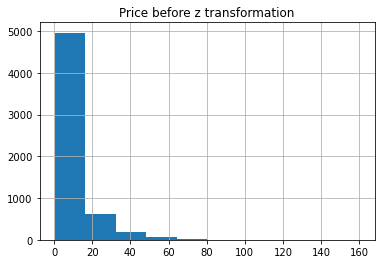

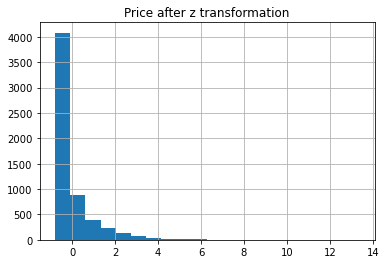

In [24]:
train_data['Price'].hist(bins=10)
plt.title('Price before z transformation')
plt.show()

train_data['Price'] = std_scaler.fit_transform(train_data[['Price']])
train_data['Price'].hist(bins=20)
plt.title('Price after z transformation')
plt.show()

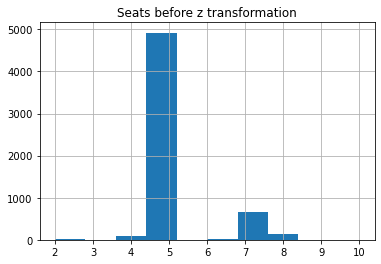

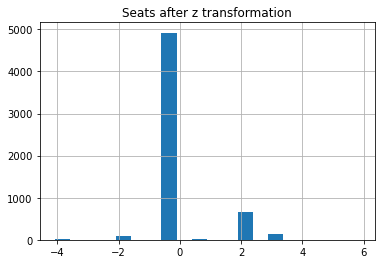

In [25]:
train_data['Seats'].hist(bins=10)
plt.title('Seats before z transformation')
plt.show()

train_data['Seats'] = std_scaler.fit_transform(train_data[['Seats']])
train_data['Seats'].hist(bins=20)
plt.title('Seats after z transformation')
plt.show()

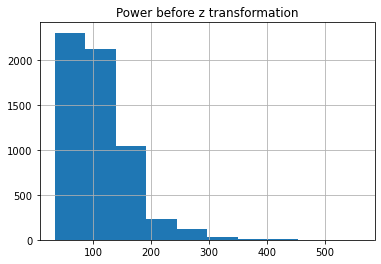

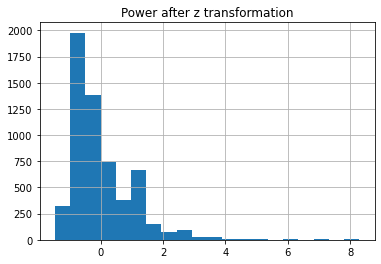

In [26]:
train_data['Power'].hist(bins=10)
plt.title('Power before z transformation')
plt.show()

train_data['Power'] = std_scaler.fit_transform(train_data[['Power']])
train_data['Power'].hist(bins=20)
plt.title('Power after z transformation')
plt.show()

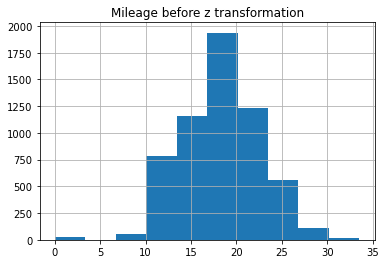

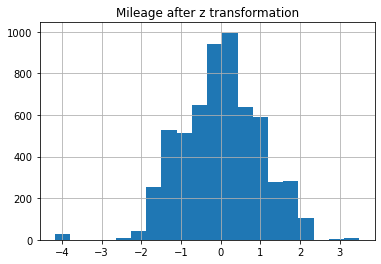

In [27]:
train_data['Mileage'].hist(bins=10)
plt.title('Mileage before z transformation')
plt.show()

train_data['Mileage'] = std_scaler.fit_transform(train_data[['Mileage']])
train_data['Mileage'].hist(bins=20)
plt.title('Mileage after z transformation')
plt.show()

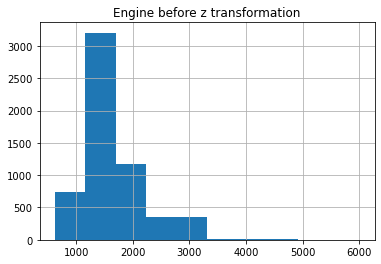

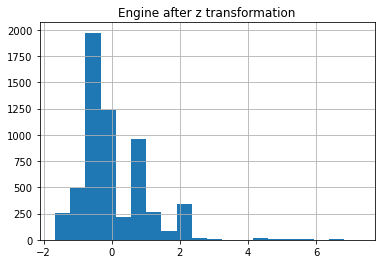

In [28]:
train_data['Engine'].hist(bins=10)
plt.title('Engine before z transformation')
plt.show()

train_data['Engine'] = std_scaler.fit_transform(train_data[['Engine']])
train_data['Engine'].hist(bins=20)
plt.title('Engine after z transformation')
plt.show()

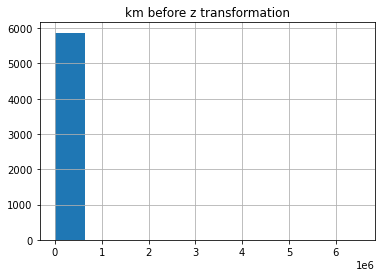

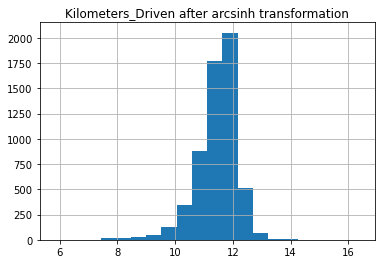

In [38]:
train_data['Kilometers_Driven'].hist(bins=10)
plt.title('km before z transformation')
plt.show()

train_data['arcsinh_km'] = np.arcsinh(train_data[('Kilometers_Driven')])
#arcsinh was chosen to include 0 values (unlike log)

#train_data['arcsinh_Km'] = std_scaler.fit_transform(train_data[['arcsinh_Km']])
train_data[('arcsinh_km')].hist(bins=20)
plt.title('Kilometers_Driven after arcsinh transformation')
plt.show()

# Insights from univariate analysis:

- Price is skewed right
- Seats are slightly skewed left
- Power is skewed right
- Mileage is skewed slightly left
- Engine is skewed slightly right
- km driven will be transformed via hyperbolic sine funciton to make it more gaussian 

# Bivariate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

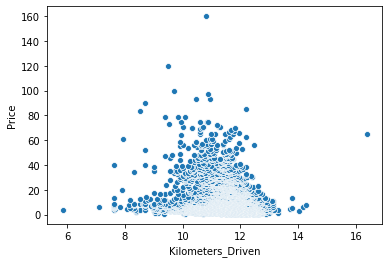

In [39]:
##Look at km vs price

sns.scatterplot(y=train_copy["Price"], x=np.arcsinh(train_copy["Kilometers_Driven"]))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

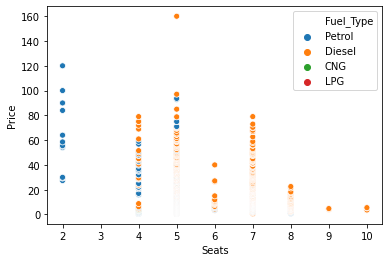

In [31]:
sns.scatterplot(x=train_copy["Seats"], y=train_copy["Price"], hue =train_copy["Fuel_Type"] )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

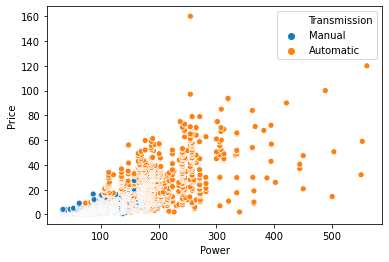

In [32]:
sns.scatterplot(x=train_copy["Power"], y=train_copy["Price"], hue =train_copy["Transmission"] )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

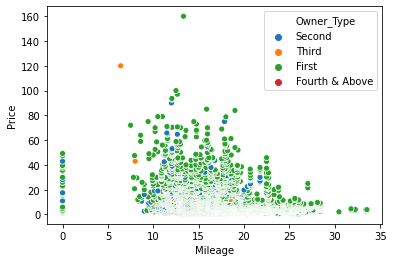

In [33]:
sns.scatterplot(x=train_copy["Mileage"], y=train_copy["Price"], hue =train_copy["Owner_Type"] )
plt.show

In [34]:
# I will first look at correlations between the variables
train_copy2 = train_copy.drop(["S.No.", "Location", "Name", "Fuel_Type", "Transmission", "Owner_Type", "New_Price"], axis=1)
train_copy2["Kilometers_Driven"] = np.arcsinh(train_copy2['Kilometers_Driven'])
train_copy2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
1713,2011,11.775290,26.00,624,35.0,4.0,0.44
3138,1998,12.156357,17.30,993,60.0,5.0,0.45
2847,2005,12.055250,15.30,1341,83.0,5.0,0.45
1628,2004,10.085809,16.10,796,37.0,4.0,0.45
3228,2003,11.552146,16.10,796,37.0,4.0,0.50
...,...,...,...,...,...,...,...
1974,2018,10.935248,12.05,2979,320.0,5.0,93.67
1505,2019,10.859499,12.65,2993,255.0,5.0,97.07
5919,2015,9.680344,12.50,5000,488.1,2.0,100.00
5781,2011,9.472705,6.40,5204,560.0,2.0,120.00


In [35]:
train_copy2.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,2013.476507,11.443181,18.273829,1625.701226,113.272203,5.283623,9.601551
std,3.166025,0.717954,4.371965,601.544134,53.873317,0.804961,11.248283
min,1998.000000,5.834819,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,11.110393,15.260000,1198.000000,75.000000,5.000000,3.512500
50%,2014.000000,11.564027,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,11.883223,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,16.380460,33.540000,5998.000000,560.000000,10.000000,160.000000


In [36]:
#train_copy = train_copy.pivot("Year", "Mileage", "Price")
#plt.subplots(figsize=(28, 15))
#,cmap='coolwarm', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,square=False, linewidths=.7
train_copy2.corr()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.497730,0.285191,-0.067918,0.014612,0.007960,0.299543
Kilometers_Driven,-0.497730,1.000000,-0.123609,0.157246,0.016975,0.193508,-0.179621
Mileage,0.285191,-0.123609,1.000000,-0.636028,-0.537729,-0.330711,-0.340554
Engine,-0.067918,0.157246,-0.636028,1.000000,0.866303,0.401130,0.658044
Power,0.014612,0.016975,-0.537729,0.866303,1.000000,0.101487,0.772837
Seats,0.007960,0.193508,-0.330711,0.401130,0.101487,1.000000,0.055616
Price,0.299543,-0.179621,-0.340554,0.658044,0.772837,0.055616,1.000000


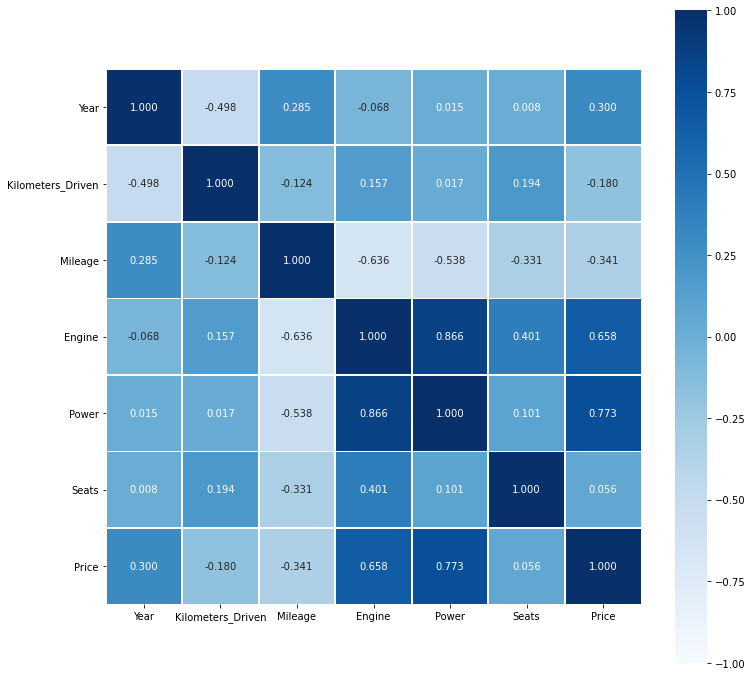

In [37]:
plt.subplots(figsize=(12,12))
sns.heatmap(train_copy2.corr(),cmap='Blues',annot=True, fmt=".3f", vmin=-1, vmax=1, center= 0, square=True, linewidths=.7)
plt.show()

## Inisights from bivariate data:

-power (r=0.77) and engine (r=0.66) correlate the most with price

-mileage moderately corrlelates with price (r = -0.341)

-year also moderately correlates with price (r = 0.3)

-based on this heatmap and scatterplot, seats (r=0.056) correlates with price the least

## One Hot Encoding

In [44]:
train_copy3 = train_copy.copy()
train_copy3["Kilometers_Driven_arcsinh"] = np.arcsinh(train_copy3['Kilometers_Driven'])

train_copy3 = train_copy3.drop(["S.No.","New_Price", "Name", "Kilometers_Driven"], axis =1)
train_copy3
cdata = pd.get_dummies(train_copy3, drop_first= True)
cdata.head()

,Year,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_arcsinh,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1713,2011,26.0,624,35.0,4.0,0.44,11.775290,0,0,0,...,0,0,1,0,0,1,1,0,1,0
3138,1998,17.3,993,60.0,5.0,0.45,12.156357,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2847,2005,15.3,1341,83.0,5.0,0.45,12.055250,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1628,2004,16.1,796,37.0,4.0,0.45,10.085809,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3228,2003,16.1,796,37.0,4.0,0.50,11.552146,0,0,0,...,0,0,1,0,0,1,1,0,0,0


Insights 
- i ended up removing the name and new_price column for this part of the dataset since they made the on hot encoding step much longer. My New_price column is still an object-type column as i have not converted it to a float yet 
- update after the modelling step: I ended up removing this column all together based on the numerous missing values

## Model 


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regression_model = LinearRegression() 
train_copy4 = cdata.copy()
X = cdata.drop(columns =['Price'])
y = train_copy4["Price"]


# X_train = train_copy5
# y_train = train_copy6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model.fit(X_train, y_train) 

LinearRegression()

In [46]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Year is 0.820640472340503
The coefficient for Mileage is -0.2042103801713088
The coefficient for Engine is 0.0006313444810276657
The coefficient for Power is 0.12454084287898938
The coefficient for Seats is -0.9282974876396373
The coefficient for Kilometers_Driven_arcsinh is -1.8225725634984011
The coefficient for Location_Bangalore is 1.7923105716651224
The coefficient for Location_Chennai is 1.2168872171776182
The coefficient for Location_Coimbatore is 2.5386826710326256
The coefficient for Location_Delhi is -0.24785688264316127
The coefficient for Location_Hyderabad is 1.7599804734206412
The coefficient for Location_Jaipur is 1.0491021809040555
The coefficient for Location_Kochi is 0.041468923511159377
The coefficient for Location_Kolkata is -1.3968525424255378
The coefficient for Location_Mumbai is -0.9793232742008293
The coefficient for Location_Pune is 0.8243159562441179
The coefficient for Fuel_Type_Diesel is -1.3195406764198034
The coefficient for Fuel_Type_

In [47]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1624.4844817171831


In [48]:
regression_model.score(X_train, y_train)

0.7362256605745687

# Insights from my model on the training data:
- Engine was the lowest absolute weight on Price
- Fuel_Type_Petrol was the highest absolute weight on Price

In [49]:
regression_model.score(X_test, y_test)

0.6723069174712188

## Find out how well the model performed

In [66]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Adjusted R^2
def adj_r2(ind_vars, actual, goal):
    r2 = r2_score(actual, goal)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_performance(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    print("Root mean square error:".ljust(39), np.sqrt(mean_squared_error(y_act, y_pred)), "\n"   
           "mean abs error:".ljust(40), mean_absolute_error(y_act, y_pred), "\n"
           "R^2:".ljust(40), r2_score(y_act, y_pred), "\n"
           "Adjust R^2:".ljust(40), adj_r2(inp, y_act, y_pred))

In [67]:
print('Training Performance\n')
print(model_performance(regression_model, X_train, y_train))

Training Performance

Root mean square error:                 5.732738325722466 
mean abs error:                         3.659205757234382 
R^2:                                    0.7362256605745687 
Adjust R^2:                             0.734741244179466
None


In [68]:
print(model_performance(regression_model, X_test, y_test))

Root mean square error:                 6.548932873704343 
mean abs error:                         3.645878691555 
R^2:                                    0.6723069174712188 
Adjust R^2:                             0.6679728513998203
None


### Insights from the model analysis
- training and testing root mean square error are 5.73 and 6.54, signifying a close but not perfect fit to the test data
- R^2 score is 0.67, meaning that 67% of the total variation in the dataset is explained by our model

# Testing the assumptions of linear regression model

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedacity**
4. **Linearity of variables**
5. **Normality of error terms**


## 1. No multicollinearity

In [69]:
# first add a column with a constant value of 1

copy_train = train_copy4.copy()

copy_train['const'] = 1
copy_train.head()

,Year,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_arcsinh,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,const
1713,2011,26.0,624,35.0,4.0,0.44,11.775290,0,0,0,...,0,1,0,0,1,1,0,1,0,1
3138,1998,17.3,993,60.0,5.0,0.45,12.156357,0,0,0,...,0,0,0,0,1,1,0,0,1,1
2847,2005,15.3,1341,83.0,5.0,0.45,12.055250,0,0,0,...,0,1,0,0,1,1,0,1,0,1
1628,2004,16.1,796,37.0,4.0,0.45,10.085809,0,0,0,...,0,0,0,0,1,1,0,1,0,1
3228,2003,16.1,796,37.0,4.0,0.50,11.552146,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_train = pd.Series([variance_inflation_factor(copy_train.values,i) for i in range(copy_train.shape[1])],index=copy_train.columns)
print('Columns pre feature selection: \n\n{}\t'.format(vif_train))

Columns pre feature selection: 

Year                              2.200835
Mileage                           2.981279
Engine                            9.120134
Power                             8.234983
Seats                             1.893705
Price                             3.532727
Kilometers_Driven_arcsinh         1.762184
Location_Bangalore                2.464715
Location_Chennai                  2.945874
Location_Coimbatore               3.546965
Location_Delhi                    3.167143
Location_Hyderabad                3.779062
Location_Jaipur                   2.661927
Location_Kochi                    3.589817
Location_Kolkata                  3.121027
Location_Mumbai                   3.999616
Location_Pune                     3.364401
Fuel_Type_Diesel                 28.102334
Fuel_Type_LPG                     1.198029
Fuel_Type_Petrol                 29.067931
Transmission_Manual               1.902445
Owner_Type_Fourth & Above         1.009637
Owner_Type_Second    

In [71]:
# now we need to determine which columsn to drop and keep in order to meet no multicollinearity in the data
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Loop thru each column and drop every column that has VIF score > 5
    Loop thru the adjusted R square
    Loop thru the RMSE of all these models on test data
    """
    adj_rsq = []
    rmse_test = []
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    
    # build models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        
        # Create the model
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq,
            "Test RMSE": rmse_test,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=True)

    print(temp)

In [72]:
high_vif_columns = ["Engine", "Power", "Fuel_Type_Diesel", "Fuel_Type_Petrol"]

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col  Test RMSE
1             Power                    0.682229   7.098560
3  Fuel_Type_Petrol                    0.733365   6.559357
0            Engine                    0.734610   6.549132
2  Fuel_Type_Diesel                    0.734622   6.549099


## insights 
- By dropping power, my model will increase RMSE the most , so I will drop it and then check VIF

In [73]:
X_train2 = X_train1.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                              1.998971
Mileage                           3.029674
Engine                            3.297451
Seats                             1.551573
Kilometers_Driven_arcsinh         1.686886
Location_Bangalore                2.405652
Location_Chennai                  2.931970
Location_Coimbatore               3.534453
Location_Delhi                    3.029322
Location_Hyderabad                3.732678
Location_Jaipur                   2.592087
Location_Kochi                    3.514134
Location_Kolkata                  2.963564
Location_Mumbai                   3.840816
Location_Pune                     3.412504
Fuel_Type_Diesel                 29.182221
Fuel_Type_LPG                     1.177938
Fuel_Type_Petrol                 30.154132
Transmission_Manual               1.658787
Owner_Type_Fourth & Above         1.010788
Owner_Type_Second                 1.156769
Owner_Type_Third                  1.101690
constant           

In [74]:
high_vif_columns = ["Fuel_Type_Diesel","Fuel_Type_Petrol"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col  Test RMSE
1  Fuel_Type_Petrol                    0.733365   6.559357
0  Fuel_Type_Diesel                    0.734622   6.549099


#### By dropping Fuel_Type_Petrol, my model will increase RMSE the most , so I will drop it and then check VIF

In [75]:
X_train3 = X_train2.drop("Fuel_Type_Petrol", axis =1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Year                              1.998787
Mileage                           2.857499
Engine                            3.241683
Seats                             1.543772
Kilometers_Driven_arcsinh         1.678956
Location_Bangalore                2.405149
Location_Chennai                  2.930144
Location_Coimbatore               3.532999
Location_Delhi                    3.027820
Location_Hyderabad                3.731727
Location_Jaipur                   2.590197
Location_Kochi                    3.513891
Location_Kolkata                  2.961315
Location_Mumbai                   3.840660
Location_Pune                     3.412168
Fuel_Type_Diesel                  2.026547
Fuel_Type_LPG                     1.008654
Transmission_Manual               1.658110
Owner_Type_Fourth & Above         1.010780
Owner_Type_Second                 1.156243
Owner_Type_Third                  1.101575
constant                     814864.565101
dtype: float64



### Insights
- dropping Fuel_Type_Petrol has reduced all of the vifs such that they are within an acceptable range

In [76]:
lin_reg_model = LinearRegression(fit_intercept=False)
lin_reg_model.fit(X_train3,y_train)

print('Training Performance\n')
print(model_performance(lin_reg_model, X_train3, y_train))

Training Performance

Root mean square error:                 6.2825883956841295 
mean abs error:                         4.032482163908591 
R^2:                                    0.6831997449759999 
Adjust R^2:                             0.6814948512356556
None


### Observations from multicollinearity test

- Earlier R-squared was 0.67, and now it is increased to 0.68, which means that removing the 2 variables did not affect the model 
- Now Adjusted R-squared is 0.68, which means that our model explains 68% of variance wheras the previous  Adjusted-R squared was 68% which shows an improvement in the model overall

## 2. Mean of residuals should be 0

In [77]:
actual = lin_reg_model.predict(X_train3)
residual = actual - y_train.values

np.mean(residual)

-7.038780488491517e-13

### Insights 
- the residual is -7.04 x10^(-13), meaning it is very small 

## 3. Linearity Test

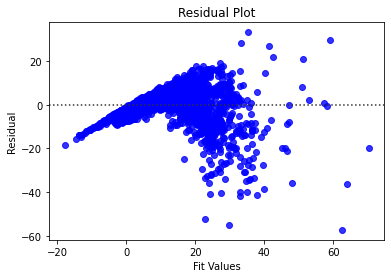

In [78]:
sns.residplot(actual,residual,color="blue")
plt.xlabel("Fit Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

### Insights

- There seems to be a slight linearity in the first part of the data, but overall, there is no overall trend, however, to try to fix this, I will transform a few columns 

In [ ]:
#X_train3["Kilometers_Driven"] = np.log10(X_train3["Kilometers_Driven"])
#X_train3["Kilometers_Driven"] = np.exp(X_train3["Kilometers_Driven"])
#X_train3["Year"] = np.log(X_train3["Year"])
X_train3

#when I tried to do perform the transformations above, the model became a much poorer fit and failed the residual mean 
#=0 assumtion, so I did not keep these transformations

### 4. Homoscedacity Test

Since the data is not completely asymmetric in the residual plot, we can assume this assumtion is met. While the symmetry can be improved, the transformed data could negatively impact other assumptions as well as the test performance

### 5. Normality Test

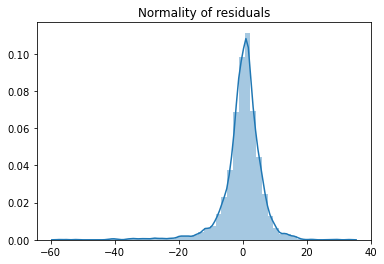

In [79]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

### Insights
- we see that while the data is normally distributed, there is a left skew

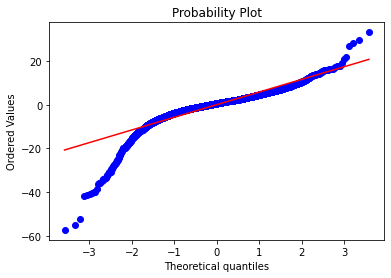

In [80]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

### Insights
- we see that while the data realtively follows a straight line, the values are skewed in the [-3,-1] range
- however, when we transform other variables, via log, arcsinh, square root, and exponential, as above, the model is not as accurate as without the transformations, so I won't keep those transformations

## Predicting the test data

In [81]:
X_train3.columns

Index(['Year', 'Mileage', 'Engine', 'Seats', 'Kilometers_Driven_arcsinh',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'constant'],
      dtype='object')

In [83]:
X_test.columns
X_test["constant"] = 1
X_test.columns
X_test.head()

X_tests = X_test[X_train3.columns]

<ipython-input-83-7ec48f97d325>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["constant"] = 1


In [84]:
y_pred = lin_reg_model.predict(X_tests)


In [85]:
print('Training Performance\n')
print(model_performance(lin_reg_model, X_train3, y_train))

Training Performance

Root mean square error:                 6.2825883956841295 
mean abs error:                         4.032482163908591 
R^2:                                    0.6831997449759999 
Adjust R^2:                             0.6814948512356556
None


In [86]:
print('Test Performance\n')
print(model_performance(lin_reg_model, X_tests, y_test))

Test Performance

Root mean square error:                 7.101025977700066 
mean abs error:                         4.00183662399763 
R^2:                                    0.6147271561231356 
Adjust R^2:                             0.6098558902810143
None


In [87]:
lin_regression = LinearRegression(fit_intercept=False)
lin_regression.fit(X_train3,y_train)

# look at coefficients 

coefficient = pd.DataFrame(lin_regression.coef_.flatten(), \
                       index=X_train3.columns.tolist(), columns=['Coefficients'])
print(coefficient)

# model performance
print('\n\nTraining Performance\n')
print(model_performance(lin_regression, X_train3, y_train))

                           Coefficients
Year                           0.914339
Mileage                       -0.129261
Engine                         0.010846
Seats                         -2.664288
Kilometers_Driven_arcsinh     -1.919860
Location_Bangalore             2.051646
Location_Chennai               0.753204
Location_Coimbatore            2.384199
Location_Delhi                -0.280930
Location_Hyderabad             1.388917
Location_Jaipur                0.680225
Location_Kochi                 0.019261
Location_Kolkata              -1.519320
Location_Mumbai               -0.808202
Location_Pune                  0.404749
Fuel_Type_Diesel               2.305509
Fuel_Type_LPG                  4.309872
Transmission_Manual           -5.081086
Owner_Type_Fourth & Above      0.115952
Owner_Type_Second             -0.226739
Owner_Type_Third               0.743399
constant                   -1808.633221


Training Performance

Root mean square error:                 6.28258839568412

### Observations
- The transmission type of manual is the most significant, followed by fuel type (LPG) on price
- Kilometers driven is the least significant on price type, followed by engine
- seats negatively impact price quite significantly
- As km driven increases, usually price decreases
- The locations, Bangalore and Coimbatore significantly increase price

## Actionable Insights & Recommendations
- Cars in Bangalore, Coimbatore, and Hyderabad tend to go for an increased Price whereas cars from Kolkata, Mumbai, and Delhi tend to go for lower prices

- Cars with a manual transmission tend to go for lower prices 
- Cars with a fuel type of LPG tend to go for a higher price
- Newer cars also tend to go for a higher price

- I would recommend looking for newer cars from either bangalore, coimbatore, and hyderabad, without a manual transmission, a lower amount of km driven, and a fuel type of LPG to maximize the price of the cars

- However, this data is purely correlational, so no causation can be determined from this trend.

### The following code was an attempt to use the train data on the NaN Price rows, but I was not successful

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,
                                                          random_state=0))

# Fit on the train data
regr_multirf.fit(X_train3, y_train)

# Check the prediction score
score = regr_multirf.score(X_test, y_test)
print("The prediction score on the test data is {:.2f}%".format(score*100))

In [ ]:
## now, I would like to predict the Price column of the rows with missing Price columns, which was split from 

from sklearn.impute import SimpleImputer

test_copy = test_data.copy()
test_copy_x = test_copy.drop(columns = ["S.No.","New_Price", "Name"])
test_cdata = pd.get_dummies(test_copy_x, drop_first= True)

tests = test_cdata.copy()
X_test = tests.drop(columns = ["Price"])
y_test = tests["Price"]

regression_imputer = SimpleImputer(missing_values=np.nan, strategy = regression_model)
y_train.fit
SimpleImputer()
print(regression_imputer.transform(y_test))

#regression_model.score(X_test, y_test)